Binary Classification of Eating Disorder Posts from Reddit

In [208]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [209]:
data = pd.read_excel('/content/Review1CapstoneDataset10k.xlsx')
data

,Title,Post Text,ID,Author,Created_utc,Permalink,Eating Disorder,Content,Type
0,"*lil rant* btw i don’t mean to be an asshole, ...",please tell me i’m not the only one who finds ...,yxutx5,Anxious-Enthusiasm-7,2022-11-17 16:38:04,https://reddit.com/r/AnorexiaRecovery/comments...,1,"*lil rant* btw i don’t mean to be an asshole, ...",Anorexia
1,I hit a healthy BMI,And I’m ok with it! Here’s to keeping going in...,wl2gds,[deleted],2022-08-10 16:52:41,https://reddit.com/r/AnorexiaRecovery/comments...,1,I hit a healthy BMI. And I’m ok with it! Here’...,Anorexia
2,I GOT MY PERIOD BACK !!,"after 2 yrs of no period, i got it back throug...",13hgcir,JokeFit5094,2023-05-14 16:18:17,https://reddit.com/r/AnorexiaRecovery/comments...,1,I GOT MY PERIOD BACK !!. after 2 yrs of no per...,Anorexia
3,a story i guess,i used go to my friends house a lot. after lun...,10d1d0s,swagalicious567,2023-01-16 01:32:28,https://reddit.com/r/AnorexiaRecovery/comments...,1,a story i guess. i used go to my friends house...,Anorexia
4,I finally ate the one food I said if I’d be ab...,GUYS I DID IT😭😭😭😭😭 I FINALLY ATE A CHEESEBURGE...,yasyf3,LaurenAshley1307,2022-10-22 17:04:40,https://reddit.com/r/AnorexiaRecovery/comments...,1,I finally ate the one food I said if I’d be ab...,Anorexia
...,...,...,...,...,...,...,...,...,...
10182,How painful is yoga supposed to be?,"40 y/o male, practicing yoga in a studio (blac...",yv7clf,Legend565252,2022-11-14 18:02:55,https://reddit.com/r/yoga/comments/yv7clf/how_...,0,How painful is yoga supposed to be?. 40 y/o ma...,NonED
10183,[COMP] Now just keep the foot there without ho...,Sending serious dedication in practice and sil...,159fg37,thementalyogi,2023-07-25 17:44:29,https://reddit.com/r/yoga/comments/159fg37/com...,0,[COMP] Now just keep the foot there without ho...,NonED
10184,My Journey with Yoga,"Hello, I’m 69, and have been practicing for 29...",113hmwg,No_Style_3018,2023-02-16 04:12:33,https://reddit.com/r/yoga/comments/113hmwg/my_...,0,"My Journey with Yoga. Hello, I’m 69, and have ...",NonED
10185,Starting Yoga at 70.,I will be 70 in a few weeks.\n\nI do some smal...,101wupy,[deleted],2023-01-03 03:29:56,https://reddit.com/r/yoga/comments/101wupy/sta...,0,Starting Yoga at 70.. I will be 70 in a few we...,NonED


In [210]:
len(data)

10187

In [211]:
data.isnull().sum()

Title               242
Post Text          1878
ID                    0
Author                0
Created_utc           0
Permalink             0
Eating Disorder       0
Content               0
Type                  0
dtype: int64

In [212]:
import pandas as pd

# Load your dataset into a pandas DataFrame
# Assuming you've loaded your data into the variable 'df'

# Get the row numbers of the duplicate rows in the 'Content' column
duplicate_indices = data[data.duplicated('Content', keep=False)].index

# Print the duplicate indices
print("Duplicate Row Indices:", duplicate_indices)

Duplicate Row Indices: Int64Index([], dtype='int64')


In [213]:
data.drop_duplicates(subset='Content', keep='first', inplace=True)


In [214]:
duplicate_indices = data[data.duplicated('Content', keep=False)].index
print("Duplicate Row Indices:", duplicate_indices)

Duplicate Row Indices: Int64Index([], dtype='int64')


In [215]:
# Find the indices where the label column has null values
null_label_indices = data[data['Eating Disorder'].isnull()].index

# Print the indices
print("Indices with null labels:", null_label_indices)

Indices with null labels: Int64Index([], dtype='int64')


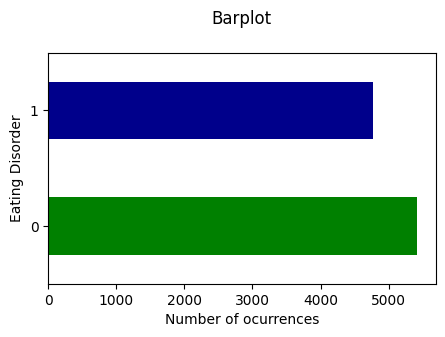

In [216]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,3))
colors = ['green','darkblue']
data.groupby('Eating Disorder').Content.count().plot.barh(
    ylim=0, color=colors, title= 'Barplot\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

In [217]:
data.groupby('Eating Disorder').Content.count()

Eating Disorder
0    5418
1    4769
Name: Content, dtype: int64

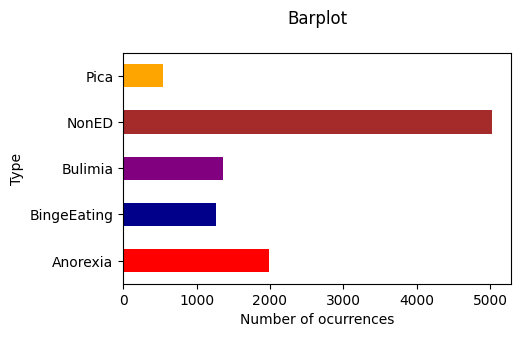

In [218]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,3))
colors = ['red','darkblue','purple','brown','orange']
data.groupby('Type').Content.count().plot.barh(
    ylim=0, color=colors, title= 'Barplot\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

In [219]:
data.groupby('Type').Content.count()

Type
Anorexia       1992
BingeEating    1262
Bulimia        1365
NonED          5032
Pica            536
Name: Content, dtype: int64

In [220]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"U0001F600-U0001F64F"  # emoticons
                           u"U0001F300-U0001F5FF"  # symbols & pictographs
                           u"U0001F680-U0001F6FF"  # transport & map symbols
                           u"U0001F1E0-U0001F1FF"  # flags (iOS)
                           u"U00002702-U000027B0"
                           u"U000024C2-U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


data['Content'] = data['Content'].apply(remove_emoji)

In [221]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove non-ASCII characters
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization
    stop_words = set(stopwords.words('english'))  # Stopwords
    tokens = [word for word in tokens if word not in stop_words]
    ps = PorterStemmer()  # Stemming
    tokens = [ps.stem(word) for word in tokens]
    return ' '.join(tokens)
# Applying preprocessing to the text column
data['Content'] = data['Content'].apply(preprocess_text)

In [222]:
data[25::]

,Title,Post Text,ID,Author,Created_utc,Permalink,Eating Disorder,Content,Type
25,I DID IT I DID IT! I JUST DECLARED MY ED WITH ...,So today I had a massive relapsed all day (sev...,11jm59h,lovelybloomm,2023-03-06 02:47:58,https://reddit.com/r/AnorexiaRecovery/comments...,1,w w today massiv relaps day sever motnh could ...,Anorexia
26,hot chocolate is no longer a fear food,"Oh my gods, can't believe I was terrified of t...",10y3y2w,kamikazekraken,2023-02-09 19:37:54,https://reddit.com/r/AnorexiaRecovery/comments...,1,hot chocol longer fear food h god cant believ ...,Anorexia
27,The contradictions of anorexia (with some trea...,Anorexia is:\n\n* Wanting to escape your body ...,ykrkqg,learning_corner,2022-11-03 03:56:16,https://reddit.com/r/AnorexiaRecovery/comments...,1,contradict anorexia treatment recoveri norexia...,Anorexia
28,how do you deal with the “oh you gained weight...,i gained 17 kg since i started eating right an...,z6q4m0,janelagasse,2022-11-28 07:30:06,https://reddit.com/r/AnorexiaRecovery/comments...,1,deal oh gain weight bullshit recov anorexia ga...,Anorexia
29,I got my period!!!,\nFor the first time in four years I got my pe...,14lstme,Chaotic-ideas,2023-06-29 02:39:27,https://reddit.com/r/AnorexiaRecovery/comments...,1,got period first time four year got period put...,Anorexia
...,...,...,...,...,...,...,...,...,...
10182,How painful is yoga supposed to be?,"40 y/o male, practicing yoga in a studio (blac...",yv7clf,Legend565252,2022-11-14 18:02:55,https://reddit.com/r/yoga/comments/yv7clf/how_...,0,ow pain yoga suppos yo male practic yoga studi...,NonED
10183,[COMP] Now just keep the foot there without ho...,Sending serious dedication in practice and sil...,159fg37,thementalyogi,2023-07-25 17:44:29,https://reddit.com/r/yoga/comments/159fg37/com...,0,ow keep foot without hold end seriou dedic pra...,NonED
10184,My Journey with Yoga,"Hello, I’m 69, and have been practicing for 29...",113hmwg,No_Style_3018,2023-02-16 04:12:33,https://reddit.com/r/yoga/comments/113hmwg/my_...,0,ourney yoga ello practic year nitial eschew wo...,NonED
10185,Starting Yoga at 70.,I will be 70 in a few weeks.\n\nI do some smal...,101wupy,[deleted],2023-01-03 03:29:56,https://reddit.com/r/yoga/comments/101wupy/sta...,0,tart yoga week small weight train resist band ...,NonED


In [223]:
# Splitting data into features and labels
X = data['Content']
y = data['Eating Disorder']

In [224]:
# Splitting the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [225]:
# Bag of Words vectorization
count_vectorizer = CountVectorizer(max_features=5000)  # You can adjust the number of features
X_train_bow = count_vectorizer.fit_transform(X_train)
X_val_bow = count_vectorizer.transform(X_val)
X_test_bow = count_vectorizer.transform(X_test)

#Multinomial Naive Bayes

In [226]:
# Naive Bayes model
model = MultinomialNB()
model.fit(X_train_bow, y_train)

MultinomialNB()

In [227]:
# Prediction on validation set
y_val_pred = model.predict(X_val_bow)

# Model evaluation
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

Validation Accuracy: 0.9064136125654451
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91       802
           1       0.87      0.95      0.91       726

    accuracy                           0.91      1528
   macro avg       0.91      0.91      0.91      1528
weighted avg       0.91      0.91      0.91      1528

Validation Confusion Matrix:
 [[695 107]
 [ 36 690]]


In [228]:
# Prediction on test set
y_test_pred = model.predict(X_test_bow)

# Final model evaluation
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Test Accuracy: 0.9045127534336167
Test Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90       793
           1       0.86      0.96      0.91       736

    accuracy                           0.90      1529
   macro avg       0.91      0.91      0.90      1529
weighted avg       0.91      0.90      0.90      1529

Test Confusion Matrix:
 [[680 113]
 [ 33 703]]


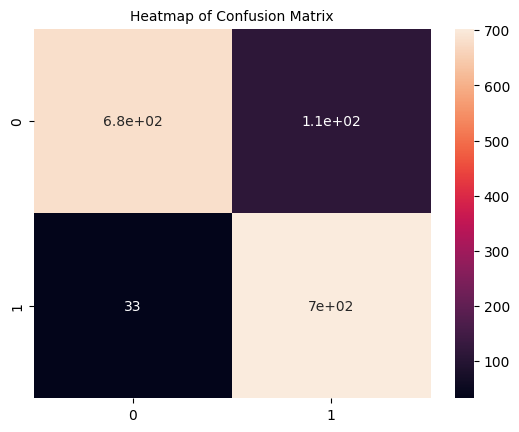

In [229]:
import seaborn as sns
cm_4 = confusion_matrix(y_test, y_test_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 10)
sns.heatmap(cm_4, annot = True)
plt.show()

#Logistic Regression

In [230]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset, assuming you have a 'text' column and a 'label' column ('ED' or 'Not ED')
# Replace this with your actual data loading code
df = data

In [231]:
# Splitting the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#Feature Extraction - TF-IDF

In [232]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the number of features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [233]:
# Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Prediction on validation set
y_val_pred = model.predict(X_val_tfidf)

In [234]:
# Model evaluation
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

Validation Accuracy: 0.9057591623036649
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       802
           1       0.91      0.89      0.90       726

    accuracy                           0.91      1528
   macro avg       0.91      0.90      0.91      1528
weighted avg       0.91      0.91      0.91      1528

Validation Confusion Matrix:
 [[741  61]
 [ 83 643]]


In [235]:
# Prediction on test set
y_test_pred = model.predict(X_test_tfidf)
# Final model evaluation
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Test Accuracy: 0.907782864617397
Test Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       793
           1       0.92      0.89      0.90       736

    accuracy                           0.91      1529
   macro avg       0.91      0.91      0.91      1529
weighted avg       0.91      0.91      0.91      1529

Test Confusion Matrix:
 [[733  60]
 [ 81 655]]


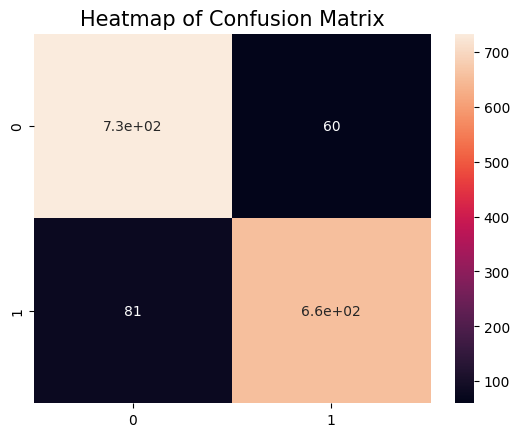

In [236]:
cm_3 = confusion_matrix(y_test, y_test_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm_3, annot = True)
plt.show()

#XGBoost

In [237]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [238]:
# XGBoost model
model = XGBClassifier()
model.fit(X_train_bow, y_train)

# Prediction on validation set
y_val_pred = model.predict(X_val_bow)

In [239]:
# Model evaluation
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

Validation Accuracy: 0.9077225130890052
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       802
           1       0.93      0.87      0.90       726

    accuracy                           0.91      1528
   macro avg       0.91      0.91      0.91      1528
weighted avg       0.91      0.91      0.91      1528

Validation Confusion Matrix:
 [[756  46]
 [ 95 631]]


In [240]:
# Prediction on test set
y_test_pred = model.predict(X_test_bow)

# Final model evaluation
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Test Accuracy: 0.9025506867233486
Test Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       793
           1       0.93      0.87      0.90       736

    accuracy                           0.90      1529
   macro avg       0.90      0.90      0.90      1529
weighted avg       0.90      0.90      0.90      1529

Test Confusion Matrix:
 [[742  51]
 [ 98 638]]


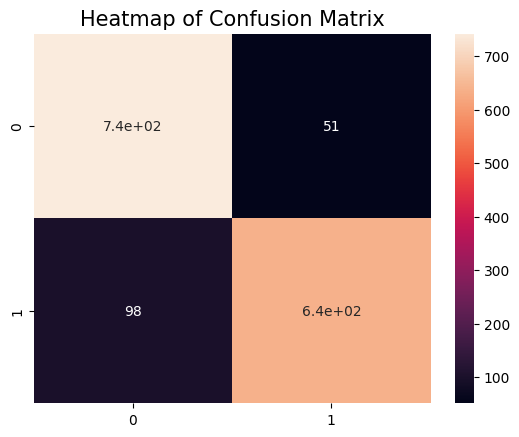

In [241]:
cm_2 = confusion_matrix(y_test, y_test_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm_2, annot = True)
plt.show()

#SVM

In [242]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [243]:
# Splitting the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [244]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the number of features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [245]:
vectorizer = CountVectorizer()
svm = LinearSVC()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
_ = svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       793
           1       0.87      0.84      0.85       736

    accuracy                           0.86      1529
   macro avg       0.86      0.86      0.86      1529
weighted avg       0.86      0.86      0.86      1529



In [246]:
# Model evaluation
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8613472858077175


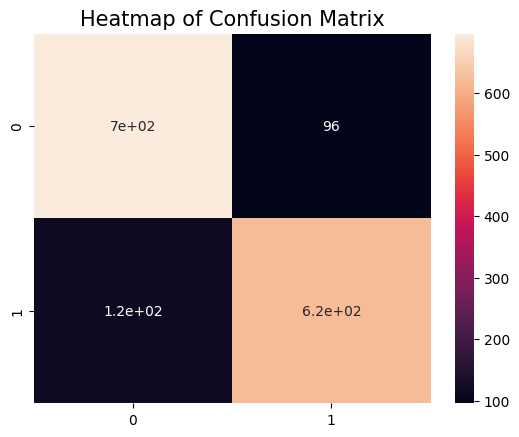

In [247]:
cm_1 = confusion_matrix(y_test, y_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm_1, annot = True)
plt.show()

#Random Forest

In [248]:
# Splitting the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [249]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the number of features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [250]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10,criterion = 'entropy')  #By default 100 Decision Trees will be created.
rf= rf.fit(X_train_tfidf,y_train)

# Prediction on validation set
y_val_pred = rf.predict(X_val_tfidf)

In [251]:
# Model evaluation
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

Validation Accuracy: 0.8802356020942408
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       802
           1       0.90      0.84      0.87       726

    accuracy                           0.88      1528
   macro avg       0.88      0.88      0.88      1528
weighted avg       0.88      0.88      0.88      1528

Validation Confusion Matrix:
 [[734  68]
 [115 611]]


In [252]:
# Prediction on test set
y_test_pred = model.predict(X_test_tfidf)
# Final model evaluation
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Test Accuracy: 0.8986265533028123
Test Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       793
           1       0.92      0.86      0.89       736

    accuracy                           0.90      1529
   macro avg       0.90      0.90      0.90      1529
weighted avg       0.90      0.90      0.90      1529

Test Confusion Matrix:
 [[741  52]
 [103 633]]


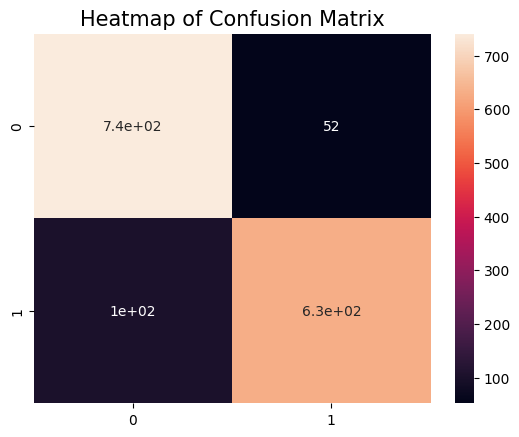

In [253]:
import seaborn as sns
cm = confusion_matrix(y_test, y_test_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

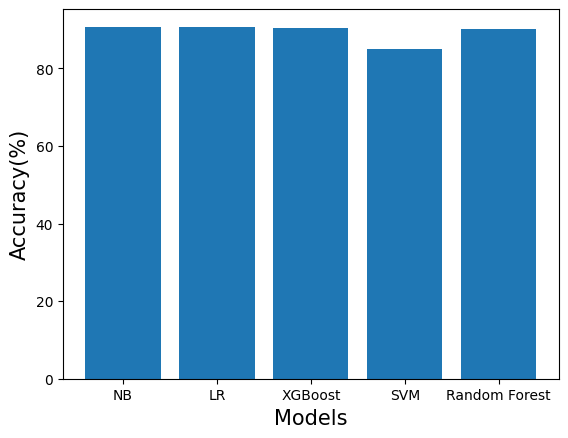

In [254]:
x = ['NB','LR','XGBoost', 'SVM' ,'Random Forest']
y = [90.58207979071289,90.7128842380641,90.32047089601046,84.89208633093526,90.05886200130805]
plt.xlabel('Models', fontsize = 15);
plt.ylabel('Accuracy(%)', fontsize = 15);
plt.bar(x,y)  #Bar graph.
plt.show()